In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
data = {
    'mesin':[1000,2000,3000,4000,5000],
    'harga':[10,25,34,55,80]
}

In [3]:
df = pd.DataFrame(data)
df

,mesin,harga
0,1000,10
1,2000,25
2,3000,34
3,4000,55
4,5000,80


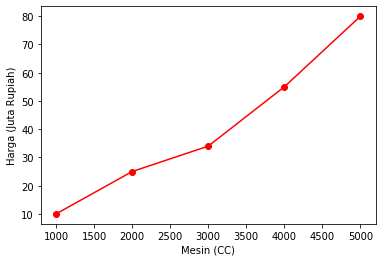

In [4]:
plt.plot(df['mesin'], df['harga'], 'ro-')
plt.xlabel('Mesin (CC)')
plt.ylabel('Harga (Juta Rupiah)')
plt.show()

In [5]:
df.corr()

,mesin,harga
mesin,1.000000,0.984321
harga,0.984321,1.000000


In [6]:
df.corr()[['harga']].sort_values('harga', ascending=False)

,harga
harga,1.000000
mesin,0.984321


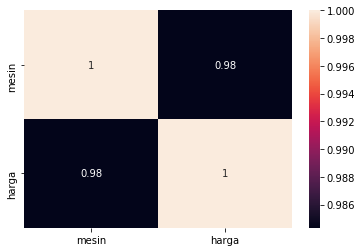

In [7]:
sns.heatmap(df.corr(),annot=True)

In [8]:
model = LinearRegression()
model.fit(df[['mesin']], df['harga'])
df['prediction'] = model.predict(df[['mesin']])
df

,mesin,harga,prediction
0,1000,10,6.8
1,2000,25,23.8
2,3000,34,40.8
3,4000,55,57.8
4,5000,80,74.8


In [9]:
print(model.coef_)
print(model.intercept_)

[0.017]
-10.200000000000017


y = ax + b

In [10]:
y = model.coef_[0]*1000 + (model.intercept_)
round(y,2)

6.8

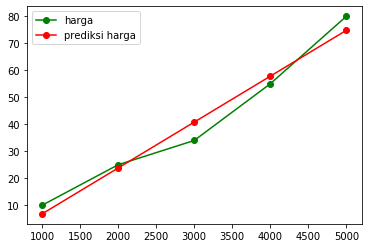

In [11]:
plt.plot(df['mesin'], df['harga'], 'go-', label='harga')
plt.plot(df['mesin'], df['prediction'], 'ro-', label='prediksi harga') #best fit line
plt.legend()
plt.show()

In [12]:
data_ads = {
    'year':[1,2,3,4,5,6,7,8,9],
    'sales':[651, 762, 856, 1063, 1190, 1298, 1421, 1440, 1518], #juta rupiah
    'ads':[23, 26, 30, 34, 43, 48, 52, 57, 58] # juta rupiah
}
df2 = pd.DataFrame(data_ads)
df2

,year,sales,ads
0,1,651,23
1,2,762,26
2,3,856,30
3,4,1063,34
4,5,1190,43
5,6,1298,48
6,7,1421,52
7,8,1440,57
8,9,1518,58


In [13]:
model2 = LinearRegression()
model2.fit(df2[['year', 'ads']], df2['sales'])
df2['sales_prediction'] = model2.predict(df2[['year', 'ads']])
df2

,year,sales,ads,sales_prediction
0,1,651,23,691.898876
1,2,762,26,780.468094
2,3,856,30,883.026924
3,4,1063,34,985.585754
4,5,1190,43,1158.092644
5,6,1298,48,1274.641085
6,7,1421,52,1377.199915
7,8,1440,57,1493.748357
8,9,1518,58,1554.338351


In [14]:
print('coef year: ', model2.coef_[0])
print('coef ads: ', model2.coef_[1])
print('intercept: ', model2.intercept_)

coef year:  46.600381598473675
coef ads:  13.989612041551833
intercept:  323.5374178503282


In [15]:
y = model2.coef_[0]*2 + model2.coef_[1]*26 + model2.intercept_
y

780.4680941276232

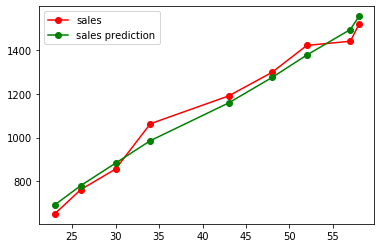

In [16]:
plt.plot(df2['ads'], df2['sales'], 'ro-', label='sales')
plt.plot(df2['ads'], df2['sales_prediction'], 'go-', label='sales prediction')
plt.legend()
plt.show()

In [17]:
df2.corr().sort_values('sales', ascending=False)['sales']

sales               1.000000
sales_prediction    0.989775
ads                 0.988288
year                0.986561
Name: sales, dtype: float64

In [18]:
bps = pd.read_excel('indo_12_1.xls', skiprows=3, skipfooter=2, na_values='-')
bps.rename(columns={'Unnamed: 0':'Provinsi'}, inplace=True)
bps.set_index('Provinsi', inplace=True)
bps

,1971,1980,1990,1995,2000,2010
Provinsi,,,,,,
Aceh,2008595.0,2611271.0,3416156.0,3847583.0,3930905.0,4494410
Sumatera Utara,6621831.0,8360894.0,10256027.0,11114667.0,11649655.0,12982204
Sumatera Barat,2793196.0,3406816.0,4000207.0,4323170.0,4248931.0,4846909
Riau,1641545.0,2168535.0,3303976.0,3900534.0,4957627.0,5538367
Jambi,1006084.0,1445994.0,2020568.0,2369959.0,2413846.0,3092265
Sumatera Selatan,3440573.0,4629801.0,6313074.0,7207545.0,6899675.0,7450394
Bengkulu,519316.0,768064.0,1179122.0,1409117.0,1567432.0,1715518
Lampung,2777008.0,4624785.0,6017573.0,6657759.0,6741439.0,7608405
Kepulauan Bangka Belitung,NaN,NaN,NaN,NaN,900197.0,1223296


## 1. Carilah Populasi Provinsi terendah 1971
## 2. Carilah Populasi Provinsi tertinggi 2010
## 3. Carilah Populasi Indonesia dari tahun 1971 - 2010
## 4. Concat 3 dataframe tadi menjadi 1
## 5. Prediksi populasi pada tahun 2050

In [19]:
# provinsi dengan populasi terendah di tahun 1971
lowest = bps[bps[1971] == bps[1971].min()]
lowest

,1971,1980,1990,1995,2000,2010
Provinsi,,,,,,
Bengkulu,519316.0,768064.0,1179122.0,1409117.0,1567432.0,1715518


In [20]:
highest = bps[bps.index != "INDONESIA"]
highest = highest[highest[2010] == highest[2010].max()]
highest

,1971,1980,1990,1995,2000,2010
Provinsi,,,,,,
Jawa Barat,21623529.0,27453525.0,35384352.0,39206787.0,35729537.0,43053732


In [21]:
indo = bps[bps.index == "INDONESIA"]
indo

,1971,1980,1990,1995,2000,2010
Provinsi,,,,,,
INDONESIA,119208229.0,147490298.0,179378946.0,194754808.0,206264595.0,237641326


In [22]:
hilo = pd.concat([highest, lowest, indo])
hilo

,1971,1980,1990,1995,2000,2010
Provinsi,,,,,,
Jawa Barat,21623529.0,27453525.0,35384352.0,39206787.0,35729537.0,43053732
Bengkulu,519316.0,768064.0,1179122.0,1409117.0,1567432.0,1715518
INDONESIA,119208229.0,147490298.0,179378946.0,194754808.0,206264595.0,237641326


In [23]:
hilo = hilo.T
hilo

Provinsi,Jawa Barat,Bengkulu,INDONESIA
1971,21623529.0,519316.0,119208229.0
1980,27453525.0,768064.0,147490298.0
1990,35384352.0,1179122.0,179378946.0
1995,39206787.0,1409117.0,194754808.0
2000,35729537.0,1567432.0,206264595.0
2010,43053732.0,1715518.0,237641326.0


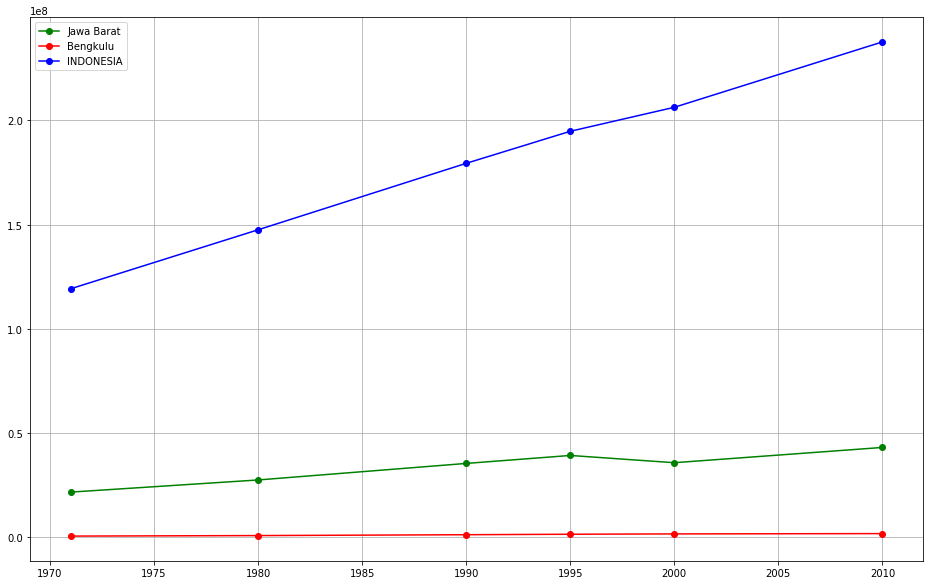

In [24]:
plt.figure(figsize=(16,10))
plt.plot(hilo.index, hilo.iloc[:,0], 'go-', label = hilo.columns.tolist()[0])
plt.plot(hilo.index, hilo.iloc[:,1], 'ro-', label = hilo.columns.tolist()[1])
plt.plot(hilo.index, hilo.iloc[:,2], 'bo-', label = hilo.columns.tolist()[2])
plt.legend()
plt.grid()
plt.show()

In [25]:
hilo.reset_index(inplace=True)

In [26]:
hilo

Provinsi,index,Jawa Barat,Bengkulu,INDONESIA
0,1971,21623529.0,519316.0,119208229.0
1,1980,27453525.0,768064.0,147490298.0
2,1990,35384352.0,1179122.0,179378946.0
3,1995,39206787.0,1409117.0,194754808.0
4,2000,35729537.0,1567432.0,206264595.0
5,2010,43053732.0,1715518.0,237641326.0


In [27]:
hilo.rename(columns={'index':'year'}, inplace=True)

In [28]:
hilo

Provinsi,year,Jawa Barat,Bengkulu,INDONESIA
0,1971,21623529.0,519316.0,119208229.0
1,1980,27453525.0,768064.0,147490298.0
2,1990,35384352.0,1179122.0,179378946.0
3,1995,39206787.0,1409117.0,194754808.0
4,2000,35729537.0,1567432.0,206264595.0
5,2010,43053732.0,1715518.0,237641326.0


In [29]:
model3 = LinearRegression()
pred_2050 = []
for i in list(range(1,4)):
    model.fit(hilo[['year']], hilo.iloc[:,i])
    hilo[f'prediction_{hilo.columns.tolist()[i]}'] = model.predict(hilo[['year']])
    pred_2050.append(int(model.predict([[2050]])))

In [30]:
pred_2050

[65443584, 3139134, 359273669]

In [31]:
hilo

Provinsi,year,Jawa Barat,Bengkulu,INDONESIA,prediction_Jawa Barat,prediction_Bengkulu,prediction_INDONESIA
0,1971,21623529.0,519316.0,119208229.0,2.299558e+07,5.334203e+05,1.202867e+08
1,1980,27453525.0,768064.0,147490298.0,2.783143e+07,8.302738e+05,1.475130e+08
2,1990,35384352.0,1179122.0,179378946.0,3.320459e+07,1.160111e+06,1.777645e+08
3,1995,39206787.0,1409117.0,194754808.0,3.589118e+07,1.325030e+06,1.928903e+08
4,2000,35729537.0,1567432.0,206264595.0,3.857776e+07,1.489948e+06,2.080161e+08
5,2010,43053732.0,1715518.0,237641326.0,4.395092e+07,1.819786e+06,2.382676e+08


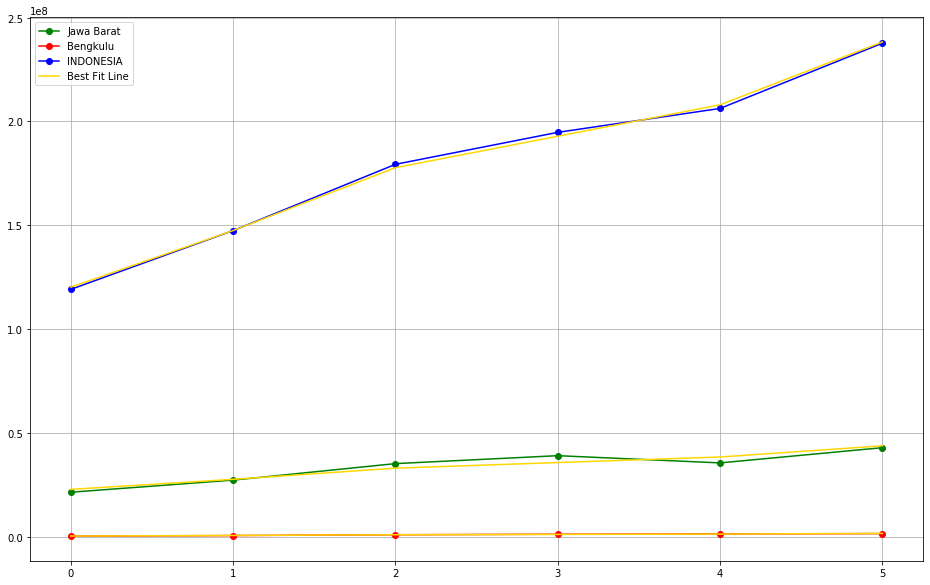

In [32]:
plt.figure(figsize=(16,10))
plt.plot(hilo.index, hilo.iloc[:,1], 'go-')
plt.plot(hilo.index, hilo.iloc[:,2], 'ro-')
plt.plot(hilo.index, hilo.iloc[:,3], 'bo-')
plt.plot(hilo.index, hilo.iloc[:,4], 'gold')
plt.plot(hilo.index, hilo.iloc[:,5], 'gold')
plt.plot(hilo.index, hilo.iloc[:,6], 'gold')
plt.legend([hilo.columns.tolist()[1], hilo.columns.tolist()[2], hilo.columns.tolist()[3], 'Best Fit Line'])
plt.grid()
plt.show()

In [33]:
print(f'Prediksi populasi Jawa Barat tahun 2050 {int(pred_2050[0]):,}')
print(f'Prediksi populasi Bengkulu tahun 2050 {int(pred_2050[1]):,}')
print(f'Prediksi populasi Indonesia tahun 2050 {int(pred_2050[2]):,}')

Prediksi populasi Jawa Barat tahun 2050 65,443,584
Prediksi populasi Bengkulu tahun 2050 3,139,134
Prediksi populasi Indonesia tahun 2050 359,273,669


In [34]:
model.coef_[0]

3025152.0173469386

In [35]:
model.intercept_

-5842287966.204422

In [36]:
df

,mesin,harga,prediction
0,1000,10,6.8
1,2000,25,23.8
2,3000,34,40.8
3,4000,55,57.8
4,5000,80,74.8


In [37]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import max_error, mean_absolute_error as mae, median_absolute_error as medae, mean_squared_log_error as msle
from sklearn.metrics import r2_score

In [38]:
max_err = max_error(df['harga'], df['prediction'])
mae_err = mae(df['harga'], df['prediction'])
mse_err = mse(df['harga'], df['prediction'])
rmse_err = np.sqrt(mse_err)
medae_error = medae(df['harga'], df['prediction'])
msle_error = msle(df['harga'], df['prediction'])
rmsle_error = np.sqrt(msle_error)
r2 = r2_score(df['harga'], df['prediction'])

In [39]:
print('Max Error', max_err)
print('Mean Absolute Error', mae_err)
print('Mean Squared Error', mse_err)
print('Root Mean Squared Error', rmse_err)
print('Median Absolute Error', medae_error)
print('Mean Squared Logaritmic Error', msle_error)
print('Root Mean Squared Logaritmic Error', rmsle_error)
print('R2_Score', r2)

Max Error 6.799999999999997
Mean Absolute Error 3.840000000000001
Mean Squared Error 18.559999999999988
Root Mean Squared Error 4.308131845707602
Median Absolute Error 3.2000000000000135
Mean Squared Logaritmic Error 0.031743602854055517
Root Mean Squared Logaritmic Error 0.17816734508336682
R2_Score 0.968888292879174


# Multivariate Linear Regression

In [40]:
df.drop('prediction', axis=1,inplace=True)

In [41]:
df['usia'] = [12, 10, 9, 5, 4]
df['odo'] = [235000, 200000, 150000, 100000, 90000]
df['penumpang'] = [4, 6, 4, 6, 6]
df['merk'] = ['Daihatsu', 'Mitsubishi', 'Honda', 'Toyota', 'BMW']

In [42]:
df = df['mesin usia odo penumpang merk harga'.split()]
df

,mesin,usia,odo,penumpang,merk,harga
0,1000,12,235000,4,Daihatsu,10
1,2000,10,200000,6,Mitsubishi,25
2,3000,9,150000,4,Honda,34
3,4000,5,100000,6,Toyota,55
4,5000,4,90000,6,BMW,80


In [43]:
df.corr()['harga'].sort_values(ascending=False)

harga        1.000000
mesin        0.984321
penumpang    0.628471
odo         -0.945458
usia        -0.974577
Name: harga, dtype: float64

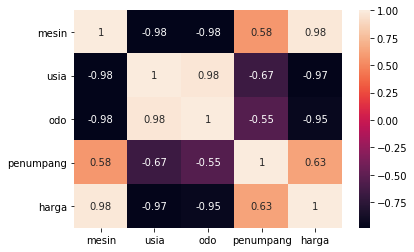

In [44]:
sns.heatmap(df.corr(), annot=True)

In [45]:
model1 = LinearRegression()
model1.fit(df[['mesin']], df['harga'])
df['pred_mes'] = model1.predict(df[['mesin']])
df

C:\Users\R7891\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,mesin,usia,odo,penumpang,merk,harga,pred_mes
0,1000,12,235000,4,Daihatsu,10,6.8
1,2000,10,200000,6,Mitsubishi,25,23.8
2,3000,9,150000,4,Honda,34,40.8
3,4000,5,100000,6,Toyota,55,57.8
4,5000,4,90000,6,BMW,80,74.8


In [46]:
max_err = max_error(df['harga'], df['pred_mes'])
mae_err = mae(df['harga'], df['pred_mes'])
mse_err = mse(df['harga'], df['pred_mes'])
rmse_err = np.sqrt(mse_err)
medae_error = medae(df['harga'], df['pred_mes'])
msle_error = msle(df['harga'], df['pred_mes'])
rmsle_error = np.sqrt(msle_error)
r2 = r2_score(df['harga'], df['pred_mes'])

print('Max Error', max_err)
print('Mean Absolute Error', mae_err)
print('Mean Squared Error', mse_err)
print('Root Mean Squared Error', rmse_err)
print('Median Absolute Error', medae_error)
print('Mean Squared Logaritmic Error', msle_error)
print('Root Mean Squared Logaritmic Error', rmsle_error)
print('R2_Score', r2)

Max Error 6.799999999999997
Mean Absolute Error 3.840000000000001
Mean Squared Error 18.559999999999988
Root Mean Squared Error 4.308131845707602
Median Absolute Error 3.2000000000000135
Mean Squared Logaritmic Error 0.031743602854055517
Root Mean Squared Logaritmic Error 0.17816734508336682
R2_Score 0.968888292879174


In [47]:
model2 = LinearRegression()
model2.fit(df[['mesin', 'penumpang']], df['harga'])
df['pred_mes_pen'] = model2.predict(df[['mesin', 'penumpang']])
df

C:\Users\R7891\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,mesin,usia,odo,penumpang,merk,harga,pred_mes,pred_mes_pen
0,1000,12,235000,4,Daihatsu,10,6.8,5.9
1,2000,10,200000,6,Mitsubishi,25,23.8,26.5
2,3000,9,150000,4,Honda,34,40.8,38.1
3,4000,5,100000,6,Toyota,55,57.8,58.7
4,5000,4,90000,6,BMW,80,74.8,74.8


In [48]:
max_err = max_error(df['harga'], df['pred_mes_pen'])
mae_err = mae(df['harga'], df['pred_mes_pen'])
mse_err = mse(df['harga'], df['pred_mes_pen'])
rmse_err = np.sqrt(mse_err)
medae_error = medae(df['harga'], df['pred_mes_pen'])
msle_error = msle(df['harga'], df['pred_mes_pen'])
rmsle_error = np.sqrt(msle_error)
r2 = r2_score(df['harga'], df['pred_mes_pen'])

print('Max Error', max_err)
print('Mean Absolute Error', mae_err)
print('Mean Squared Error', mse_err)
print('Root Mean Squared Error', rmse_err)
print('Median Absolute Error', medae_error)
print('Mean Squared Logaritmic Error', msle_error)
print('Root Mean Squared Logaritmic Error', rmsle_error)
print('R2_Score', r2)

Max Error 5.199999999999989
Mean Absolute Error 3.7199999999999966
Mean Squared Error 15.319999999999984
Root Mean Squared Error 3.9140771581561835
Median Absolute Error 4.099999999999994
Mean Squared Logaritmic Error 0.04828349901295251
Root Mean Squared Logaritmic Error 0.21973506550606006
R2_Score 0.9743194314067319


In [49]:
model3 = LinearRegression()
model3.fit(df[['penumpang']], df['harga'])
df['pred_pen'] = model3.predict(df[['penumpang']])
df

C:\Users\R7891\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,mesin,usia,odo,penumpang,merk,harga,pred_mes,pred_mes_pen,pred_pen
0,1000,12,235000,4,Daihatsu,10,6.8,5.9,22.000000
1,2000,10,200000,6,Mitsubishi,25,23.8,26.5,53.333333
2,3000,9,150000,4,Honda,34,40.8,38.1,22.000000
3,4000,5,100000,6,Toyota,55,57.8,58.7,53.333333
4,5000,4,90000,6,BMW,80,74.8,74.8,53.333333


In [50]:
max_err = max_error(df['harga'], df['pred_pen'])
mae_err = mae(df['harga'], df['pred_pen'])
mse_err = mse(df['harga'], df['pred_pen'])
rmse_err = np.sqrt(mse_err)
medae_error = medae(df['harga'], df['pred_pen'])
msle_error = msle(df['harga'], df['pred_pen'])
rmsle_error = np.sqrt(msle_error)
r2 = r2_score(df['harga'], df['pred_pen'])

print('Max Error', max_err)
print('Mean Absolute Error', mae_err)
print('Mean Squared Error', mse_err)
print('Root Mean Squared Error', rmse_err)
print('Median Absolute Error', medae_error)
print('Mean Squared Logaritmic Error', msle_error)
print('Root Mean Squared Logaritmic Error', rmsle_error)
print('R2_Score', r2)

Max Error 28.333333333333314
Mean Absolute Error 16.133333333333336
Mean Squared Error 360.9333333333333
Root Mean Squared Error 18.998245533031024
Median Absolute Error 12.000000000000007
Mean Squared Logaritmic Error 0.28478435610617303
Root Mean Squared Logaritmic Error 0.5336519053710697
R2_Score 0.39497563810290115


In [51]:
df.corr()['harga'].sort_values(ascending=False)

harga           1.000000
pred_mes_pen    0.987076
pred_mes        0.984321
mesin           0.984321
penumpang       0.628471
pred_pen        0.628471
odo            -0.945458
usia           -0.974577
Name: harga, dtype: float64

In [52]:
model4 = LinearRegression()
model4.fit(df[['mesin','usia']], df['harga'])
df['pred_mes_us'] = model4.predict(df[['mesin','usia']])
df

C:\Users\R7891\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,mesin,usia,odo,penumpang,merk,harga,pred_mes,pred_mes_pen,pred_pen,pred_mes_us
0,1000,12,235000,4,Daihatsu,10,6.8,5.9,22.000000,7.221053
1,2000,10,200000,6,Mitsubishi,25,23.8,26.5,53.333333,24.010526
2,3000,9,150000,4,Honda,34,40.8,38.1,22.000000,38.694737
3,4000,5,100000,6,Toyota,55,57.8,58.7,53.333333,59.694737
4,5000,4,90000,6,BMW,80,74.8,74.8,53.333333,74.378947


In [54]:
np.sqrt(mse(df['harga'], df['pred_med_us']))

KeyError: 'pred_med_us'

In [55]:
np.sqrt(mse(df['harga'], df['pred_mes']))

4.308131845707602

In [56]:
np.sqrt(mse(df['harga'], df['pred_mes_us']))

4.1080152718416505

In [57]:
model4.coef_
model4.intercept_

19.905263157894694

In [58]:
df['merk'].unique()

array(['Daihatsu', 'Mitsubishi', 'Honda', 'Toyota', 'BMW'], dtype=object)

In [59]:
df['merk'].value_counts()

Honda         1
Daihatsu      1
BMW           1
Mitsubishi    1
Toyota        1
Name: merk, dtype: int64

In [60]:
def merk_conv(x):
    if x == 'Daihatsu':
        return 1
    elif x == 'Mitsubishi':
        return 2
    elif x == 'Honda':
        return 3
    elif x == 'Toyota':
        return 4
    else:
        return 5

In [61]:
df_copy = df.copy()
df_copy

,mesin,usia,odo,penumpang,merk,harga,pred_mes,pred_mes_pen,pred_pen,pred_mes_us
0,1000,12,235000,4,Daihatsu,10,6.8,5.9,22.000000,7.221053
1,2000,10,200000,6,Mitsubishi,25,23.8,26.5,53.333333,24.010526
2,3000,9,150000,4,Honda,34,40.8,38.1,22.000000,38.694737
3,4000,5,100000,6,Toyota,55,57.8,58.7,53.333333,59.694737
4,5000,4,90000,6,BMW,80,74.8,74.8,53.333333,74.378947


In [62]:
df_copy['merk'] = df_copy['merk'].apply(merk_conv)
df_copy

,mesin,usia,odo,penumpang,merk,harga,pred_mes,pred_mes_pen,pred_pen,pred_mes_us
0,1000,12,235000,4,1,10,6.8,5.9,22.000000,7.221053
1,2000,10,200000,6,2,25,23.8,26.5,53.333333,24.010526
2,3000,9,150000,4,3,34,40.8,38.1,22.000000,38.694737
3,4000,5,100000,6,4,55,57.8,58.7,53.333333,59.694737
4,5000,4,90000,6,5,80,74.8,74.8,53.333333,74.378947


In [63]:
df_copy.corr()

,mesin,usia,odo,penumpang,merk,harga,pred_mes,pred_mes_pen,pred_pen,pred_mes_us
mesin,1.000000,-0.979130,-0.984271,0.577350,1.000000,0.984321,1.000000,0.997209,0.577350,0.998546
usia,-0.979130,1.000000,0.976673,-0.672977,-0.979130,-0.974577,-0.979130,-0.986243,-0.672977,-0.988661
odo,-0.984271,0.976673,1.000000,-0.546413,-0.984271,-0.945458,-0.984271,-0.979525,-0.546413,-0.986273
penumpang,0.577350,-0.672977,-0.546413,1.000000,0.577350,0.628471,0.577350,0.636699,1.000000,0.605069
merk,1.000000,-0.979130,-0.984271,0.577350,1.000000,0.984321,1.000000,0.997209,0.577350,0.998546
harga,0.984321,-0.974577,-0.945458,0.628471,0.984321,1.000000,0.984321,0.987076,0.628471,0.985754
pred_mes,1.000000,-0.979130,-0.984271,0.577350,1.000000,0.984321,1.000000,0.997209,0.577350,0.998546
pred_mes_pen,0.997209,-0.986243,-0.979525,0.636699,0.997209,0.987076,0.997209,1.000000,0.636699,0.998371
pred_pen,0.577350,-0.672977,-0.546413,1.000000,0.577350,0.628471,0.577350,0.636699,1.000000,0.605069
pred_mes_us,0.998546,-0.988661,-0.986273,0.605069,0.998546,0.985754,0.998546,0.998371,0.605069,1.000000


In [64]:
model5 = LinearRegression()
model5.fit(df_copy[['merk']], df_copy['harga'])
df_copy['pred_merk'] = model5.predict(df_copy[['merk']])
df_copy

,mesin,usia,odo,penumpang,merk,harga,pred_mes,pred_mes_pen,pred_pen,pred_mes_us,pred_merk
0,1000,12,235000,4,1,10,6.8,5.9,22.000000,7.221053,6.8
1,2000,10,200000,6,2,25,23.8,26.5,53.333333,24.010526,23.8
2,3000,9,150000,4,3,34,40.8,38.1,22.000000,38.694737,40.8
3,4000,5,100000,6,4,55,57.8,58.7,53.333333,59.694737,57.8
4,5000,4,90000,6,5,80,74.8,74.8,53.333333,74.378947,74.8


In [65]:
#dummy variable
df_dum = df['mesin usia odo penumpang merk harga'.split()]
df_dum

,mesin,usia,odo,penumpang,merk,harga
0,1000,12,235000,4,Daihatsu,10
1,2000,10,200000,6,Mitsubishi,25
2,3000,9,150000,4,Honda,34
3,4000,5,100000,6,Toyota,55
4,5000,4,90000,6,BMW,80


In [66]:
df['merk'].unique()

array(['Daihatsu', 'Mitsubishi', 'Honda', 'Toyota', 'BMW'], dtype=object)

y = ax + b
y = a*1 + c*0 + d*0 + e*0

In [67]:
df_dum = pd.get_dummies(data=df_dum, columns=['merk'])
df_dum

,mesin,usia,odo,penumpang,harga,merk_BMW,merk_Daihatsu,merk_Honda,merk_Mitsubishi,merk_Toyota
0,1000,12,235000,4,10,0,1,0,0,0
1,2000,10,200000,6,25,0,0,0,1,0
2,3000,9,150000,4,34,0,0,1,0,0
3,4000,5,100000,6,55,0,0,0,0,1
4,5000,4,90000,6,80,1,0,0,0,0


In [68]:
df_dum.corr()['harga'].sort_values(ascending=False)

harga              1.000000
mesin              0.984321
merk_BMW           0.802470
penumpang          0.628471
merk_Toyota        0.290691
merk_Honda        -0.139204
merk_Mitsubishi   -0.323445
merk_Daihatsu     -0.630512
odo               -0.945458
usia              -0.974577
Name: harga, dtype: float64

In [69]:
model6 = LinearRegression()
model6.fit(df_dum['mesin merk_BMW penumpang usia'.split()], df_dum['harga'])
df_dum['pred_multi'] = model6.predict(df_dum['mesin merk_BMW penumpang usia'.split()])
df_dum

,mesin,usia,odo,penumpang,harga,merk_BMW,merk_Daihatsu,merk_Honda,merk_Mitsubishi,merk_Toyota,pred_multi
0,1000,12,235000,4,10,0,1,0,0,0,10.0
1,2000,10,200000,6,25,0,0,0,1,0,25.0
2,3000,9,150000,4,34,0,0,1,0,0,34.0
3,4000,5,100000,6,55,0,0,0,0,1,55.0
4,5000,4,90000,6,80,1,0,0,0,0,80.0


In [70]:
rmse_pred_multi = np.sqrt(mse(df_dum['harga'], df_dum['pred_multi']))
r2_pred_multi = r2_score(df_dum['harga'], df_dum['pred_multi'])
r2_pred_multi

1.0

In [71]:
model7 = LinearRegression()
model7.fit(df_dum.drop('harga', axis=1), df_dum['harga'])
df_dum['pred_all'] = model7.predict(df_dum.drop('harga', axis=1))
df_dum

,mesin,usia,odo,penumpang,harga,merk_BMW,merk_Daihatsu,merk_Honda,merk_Mitsubishi,merk_Toyota,pred_multi,pred_all
0,1000,12,235000,4,10,0,1,0,0,0,10.0,10.0
1,2000,10,200000,6,25,0,0,0,1,0,25.0,25.0
2,3000,9,150000,4,34,0,0,1,0,0,34.0,34.0
3,4000,5,100000,6,55,0,0,0,0,1,55.0,55.0
4,5000,4,90000,6,80,1,0,0,0,0,80.0,80.0


## Train Test Split

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
from sklearn.datasets import load_boston
data = load_boston()

In [74]:
data

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [75]:
boston = pd.DataFrame(data['data'], columns=data['feature_names'])
boston['price'] = data['target']
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [78]:
X = boston.drop('price', axis=1)
y = boston['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25)

In [79]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
48,0.25387,0.0,6.91,0.0,0.448,5.399,95.3,5.8700,3.0,233.0,17.9,396.90,30.81
456,4.66883,0.0,18.10,0.0,0.713,5.976,87.9,2.5806,24.0,666.0,20.2,10.48,19.01
318,0.40202,0.0,9.90,0.0,0.544,6.382,67.2,3.5325,4.0,304.0,18.4,395.21,10.36
487,4.83567,0.0,18.10,0.0,0.583,5.905,53.2,3.1523,24.0,666.0,20.2,388.22,11.45
343,0.02543,55.0,3.78,0.0,0.484,6.696,56.4,5.7321,5.0,370.0,17.6,396.90,7.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,0.59005,0.0,21.89,0.0,0.624,6.372,97.9,2.3274,4.0,437.0,21.2,385.76,11.12
312,0.26169,0.0,9.90,0.0,0.544,6.023,90.4,2.8340,4.0,304.0,18.4,396.30,11.72
361,3.83684,0.0,18.10,0.0,0.770,6.251,91.1,2.2955,24.0,666.0,20.2,350.65,14.19
22,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72


In [80]:
y_train

48     14.4
456    12.7
318    23.1
487    20.6
343    23.9
       ... 
132    23.0
312    19.4
361    19.9
22     15.2
470    19.9
Name: price, Length: 379, dtype: float64

In [81]:
X_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
389,8.15174,0.0,18.10,0.0,0.700,5.390,98.9,1.7281,24.0,666.0,20.2,396.90,20.85
159,1.42502,0.0,19.58,0.0,0.871,6.510,100.0,1.7659,5.0,403.0,14.7,364.31,7.39
240,0.11329,30.0,4.93,0.0,0.428,6.897,54.3,6.3361,6.0,300.0,16.6,391.25,11.38
248,0.16439,22.0,5.86,0.0,0.431,6.433,49.1,7.8265,7.0,330.0,19.1,374.71,9.52
219,0.11425,0.0,13.89,1.0,0.550,6.373,92.4,3.3633,5.0,276.0,16.4,393.74,10.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33,1.15172,0.0,8.14,0.0,0.538,5.701,95.0,3.7872,4.0,307.0,21.0,358.77,18.35
52,0.05360,21.0,5.64,0.0,0.439,6.511,21.1,6.8147,4.0,243.0,16.8,396.90,5.28
362,3.67822,0.0,18.10,0.0,0.770,5.362,96.2,2.1036,24.0,666.0,20.2,380.79,10.19
80,0.04113,25.0,4.86,0.0,0.426,6.727,33.5,5.4007,4.0,281.0,19.0,396.90,5.29


In [82]:
y_test

389    11.5
159    23.3
240    22.0
248    24.5
219    23.0
       ... 
33     13.1
52     25.0
362    20.8
80     28.0
442    18.4
Name: price, Length: 127, dtype: float64

In [83]:
model8 = LinearRegression()
model8.fit(X_train, y_train)
pred = model8.predict(X_train)
rmse_score = np.sqrt(mse(y_train, pred))
rmse_score

4.754946476067207

In [84]:
pred_test = model8.predict(X_test)
rmse_score_test = np.sqrt(mse(y_test, pred_test))
rmse_score_test

4.496320295659106

Data Analyst
-------

- batasan masalah / pertanyaan yg mau kita jawab itu apa? / Hypothesis
- acquitition data / gather data = download database, request api, server, survey
- cleaning data = outliers [salah input, ngga normal], null_value (features), impossible_value, mengecek apakah yg ingin kita prediksi ada valuenya
- visualisi = insight (bussiness insight)
- report

Data Science
--------
- Model = features selection / features extraction, corr(), Cross Validation, Cross Validation Grid Search / Randomized Search
- visualisasi
- score yg paling bagus
- report

In [85]:
def correlation_ratio(categories, measurements):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat)+1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0,cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)
    y_total_avg = np.sum(np.multiply(y_avg_array,n_array))/np.sum(n_array)
    numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array,y_total_avg),2)))
    denominator = np.sum(np.power(np.subtract(measurements,y_total_avg),2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = np.sqrt(numerator/denominator)
    return eta

In [86]:
df1 = df['mesin usia odo penumpang merk harga'.split()]

In [87]:
df1

,mesin,usia,odo,penumpang,merk,harga
0,1000,12,235000,4,Daihatsu,10
1,2000,10,200000,6,Mitsubishi,25
2,3000,9,150000,4,Honda,34
3,4000,5,100000,6,Toyota,55
4,5000,4,90000,6,BMW,80


In [88]:
correlation_ratio(df1['merk'], df1['harga'])

1.0

In [89]:
data = {
    'mesin':[1000,2000,3000,4000,5000,4000,3000],
    'usia':[12,10,9,5,4,5,4],
    'odo':[235000,200000,150000,100000,90000,85000,100000],
    'penumpang':[4,6,4,6,6,4,4],
    'merk':['Daihatsu', 'Mitsubishi', 'Honda', 'Toyota', 'BMW','BMW','Honda'],
    'harga':[10,25,34,55,80,75,85]
}
df1 = pd.DataFrame(data)
df1

,mesin,usia,odo,penumpang,merk,harga
0,1000,12,235000,4,Daihatsu,10
1,2000,10,200000,6,Mitsubishi,25
2,3000,9,150000,4,Honda,34
3,4000,5,100000,6,Toyota,55
4,5000,4,90000,6,BMW,80
5,4000,5,85000,4,BMW,75
6,3000,4,100000,4,Honda,85


In [90]:
correlation_ratio(df1['merk'], df1['harga'])

0.8653625445952525

In [91]:
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [92]:
is_cat = {}
for i in titanic.columns.tolist():
    is_cat[i] = len(titanic[i].unique())

In [93]:
is_cat

{'survived': 2,
 'pclass': 3,
 'sex': 2,
 'age': 89,
 'sibsp': 7,
 'parch': 7,
 'fare': 248,
 'embarked': 4,
 'class': 3,
 'who': 3,
 'adult_male': 2,
 'deck': 8,
 'embark_town': 4,
 'alive': 2,
 'alone': 2}

In [94]:
titanic.who.value_counts()

man      537
woman    271
child     83
Name: who, dtype: int64

In [95]:
correlation_ratio(titanic['who'], titanic['survived'])

0.5644967866491237

(array([449.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  88.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

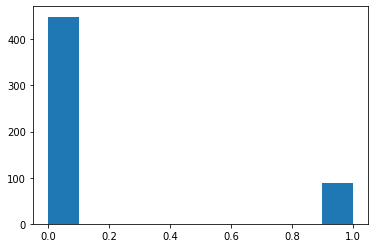

In [96]:
plt.hist(titanic[titanic['who']=='man']['survived'])

(array([ 66.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 205.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

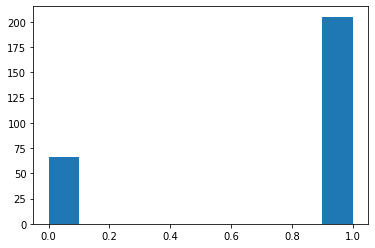

In [97]:
plt.hist(titanic[titanic['who']=='woman']['survived'])

In [98]:
correlation_ratio(titanic['class'], titanic['fare'])

0.5942173195035277

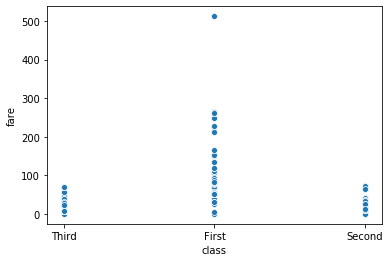

In [99]:
sns.scatterplot(x='class', y='fare', data=titanic)

In [100]:
corr_cat = {}
num_cols = titanic['survived pclass age sibsp parch fare'.split()].columns.tolist()
for i in num_cols:
    corr_cat[i] = correlation_ratio(titanic['who'], titanic[i])

In [101]:
corr_cat

{'survived': 0.5644967866491237,
 'pclass': 0.19699064115490794,
 'age': nan,
 'sibsp': 0.373806881008298,
 'parch': 0.4199716214182799,
 'fare': 0.19653582850715912}

## Scaling / Skala

In [102]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [103]:
data = {
    'x':[1,2,3,4,5,3,2,4,6,7],
    'y':[1000,2000,3000,5000,3300,6500,7000,5700,6400,3000]
}

In [104]:
mobil = df[['mesin', 'usia']]
mobil

,mesin,usia
0,1000,12
1,2000,10
2,3000,9
3,4000,5
4,5000,4


In [105]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(mobil[['mesin']])
mobil['z mesin'] = scaler.transform(mobil[['mesin']])
mobil

C:\Users\R7891\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,mesin,usia,z mesin
0,1000,12,-1.414214
1,2000,10,-0.707107
2,3000,9,0.000000
3,4000,5,0.707107
4,5000,4,1.414214


In [106]:
scalerb = StandardScaler()
mobil['z_fit_tran_mesin'] = scalerb.fit_transform(mobil[['mesin']])

C:\Users\R7891\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [107]:
mobil

,mesin,usia,z mesin,z_fit_tran_mesin
0,1000,12,-1.414214,-1.414214
1,2000,10,-0.707107,-0.707107
2,3000,9,0.000000,0.000000
3,4000,5,0.707107,0.707107
4,5000,4,1.414214,1.414214


In [108]:
mobil['z_fit_transform2']=scalerb.transform(mobil[['mesin']])

C:\Users\R7891\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [109]:
scalerb.fit(mobil[['z mesin']])
mobil['z_fit_transform3'] = scalerb.transform(mobil[['mesin']])

C:\Users\R7891\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [110]:
mobil

,mesin,usia,z mesin,z_fit_tran_mesin,z_fit_transform2,z_fit_transform3
0,1000,12,-1.414214,-1.414214,-1.414214,1000.0
1,2000,10,-0.707107,-0.707107,-0.707107,2000.0
2,3000,9,0.000000,0.000000,0.000000,3000.0
3,4000,5,0.707107,0.707107,0.707107,4000.0
4,5000,4,1.414214,1.414214,1.414214,5000.0


fit = melatih si scaler aja.
transform = mengubah value.
fit_transform = melatih sekaligus merubah.

In [111]:
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()
minmax.fit(mobil[['mesin']])
mobil['minmax'] = minmax.transform(mobil[['mesin']])

C:\Users\R7891\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [112]:
mobil

,mesin,usia,z mesin,z_fit_tran_mesin,z_fit_transform2,z_fit_transform3,minmax
0,1000,12,-1.414214,-1.414214,-1.414214,1000.0,0.00
1,2000,10,-0.707107,-0.707107,-0.707107,2000.0,0.25
2,3000,9,0.000000,0.000000,0.000000,3000.0,0.50
3,4000,5,0.707107,0.707107,0.707107,4000.0,0.75
4,5000,4,1.414214,1.414214,1.414214,5000.0,1.00


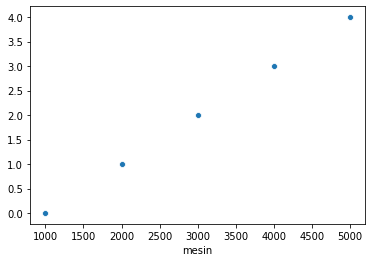

In [113]:
sns.scatterplot(x=mobil['mesin'], y=mobil.index)

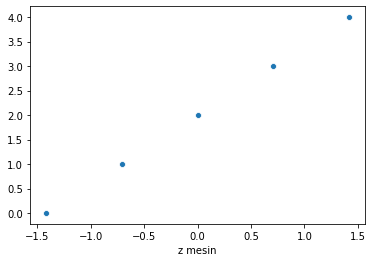

In [114]:
sns.scatterplot(x=mobil['z mesin'], y=mobil.index)

In [115]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [116]:
titanic = titanic.drop(titanic[titanic['age'].isna()==True].index, axis=0)

In [117]:
scalert = StandardScaler()
scalert.fit(titanic[['age']])
titanic['age_z'] = scalert.transform(titanic[['age']])

In [118]:
lr = LinearRegression()
lr.fit(titanic[['age_z']], titanic['fare'])
titanic['fare_prediction'] = lr.predict(titanic[['age_z']])
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_z,fare_prediction
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,-0.530377,32.000102
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,0.571831,37.599521
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,-0.254825,33.399957
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,0.365167,36.549630
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0.365167,36.549630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False,0.640719,37.949485
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,-0.185937,33.749921
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,-0.737041,30.950211
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,-0.254825,33.399957


In [119]:
titanic['age_z'].describe()

count    7.140000e+02
mean     2.174187e-16
std      1.000701e+00
min     -2.016979e+00
25%     -6.595416e-01
50%     -1.170488e-01
75%      5.718310e-01
max      3.465126e+00
Name: age_z, dtype: float64

In [120]:
input_age = 22
scaled_age = scalert.transform([[input_age]])
hasil_predict = lr.predict(scaled_age)
hasil_predict

array([32.00010245])

In [121]:
one = np.random.randint(10,50,1000)
two = np.random.randint(10,30,1000)
three = np.random.randint(1000,3000,1000)
origin = pd.DataFrame({'a': one, 'b': two, 'c':three})
origin

,a,b,c
0,15,25,1919
1,38,19,1386
2,35,21,1167
3,15,19,1687
4,39,20,1738
...,...,...,...
995,48,12,1366
996,40,14,2025
997,28,17,2442
998,37,13,2365


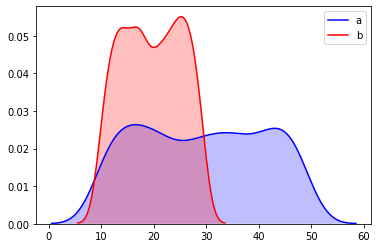

In [122]:
sns.kdeplot(origin.a,shade=True, color='blue')
sns.kdeplot(origin.b, shade=True, color='red')
plt.show()

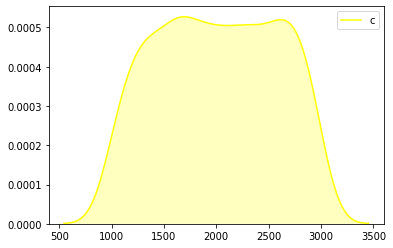

In [123]:
sns.kdeplot(origin.c, shade=True, color='yellow')
plt.show()

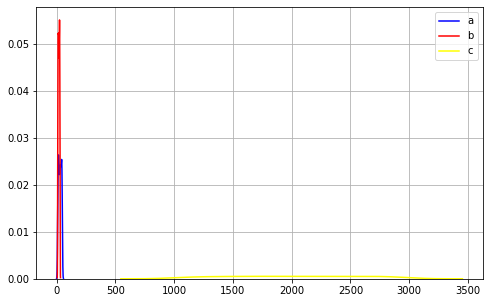

In [124]:
plt.figure(figsize=(8,5))
sns.kdeplot(origin.a, color='blue')
sns.kdeplot(origin.b, color='red')
sns.kdeplot(origin.c, color='yellow')
plt.grid()
plt.show()

## Standard Scaler
$\displaystyle Z = \frac{x_{i}-\bar{x}}{s}$

In [125]:
stdscaler = StandardScaler()
stdscaler.fit(origin['a b c'.split()])
stdscaled = stdscaler.transform(origin['a b c'.split()])
stdscalerdf = pd.DataFrame(stdscaled, columns=['a', 'b', 'c'])
stdscalerdf

,a,b,c
0,-1.195875,0.939752,-0.168978
1,0.738517,-0.118726,-1.107882
2,0.486205,0.234100,-1.493661
3,-1.195875,-0.118726,-0.577657
4,0.822621,0.057687,-0.487818
...,...,...,...
995,1.579557,-1.353617,-1.143113
996,0.906725,-1.000791,0.017746
997,-0.102523,-0.471552,0.752311
998,0.654413,-1.177204,0.616671


In [126]:
dfscaled_desc = stdscalerdf.describe()
dfscaled_desc

,a,b,c
count,1.000000e+03,1.000000e+03,1.000000e+03
mean,-9.248158e-17,3.086420e-16,1.254552e-16
std,1.000500e+00,1.000500e+00,1.000500e+00
min,-1.616395e+00,-1.706443e+00,-1.787839e+00
25%,-8.594589e-01,-8.243781e-01,-8.229521e-01
50%,-1.841878e-02,5.768706e-02,1.334195e-02
75%,9.067253e-01,9.397522e-01,8.831053e-01
max,1.663661e+00,1.645404e+00,1.733492e+00


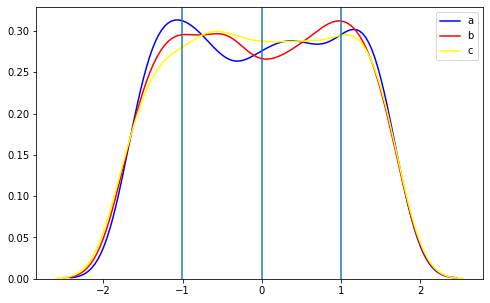

In [127]:
plt.figure(figsize=(8,5))
sns.kdeplot(stdscalerdf.a, color='blue')
sns.kdeplot(stdscalerdf.b, color='red')
sns.kdeplot(stdscalerdf.c, color='yellow')
plt.axvline(dfscaled_desc.iloc[1,0], label='mean')
plt.axvline(dfscaled_desc.iloc[2,0], label='std')
plt.axvline(-dfscaled_desc.iloc[2,0], label='std')
plt.show()

## MinMaxScaler
$\displaystyle MinMax = \frac{x_{i} - min(x)}{max(x) - min(x)}$

In [128]:
minmax = MinMaxScaler()
mmscaled = minmax.fit_transform(origin['a b c'.split()])
mmdf = pd.DataFrame(mmscaled, columns='a b c'.split())
mmdf

,a,b,c
0,0.128205,0.789474,0.459730
1,0.717949,0.473684,0.193097
2,0.641026,0.578947,0.083542
3,0.128205,0.473684,0.343672
4,0.743590,0.526316,0.369185
...,...,...,...
995,0.974359,0.105263,0.183092
996,0.769231,0.210526,0.512756
997,0.461538,0.368421,0.721361
998,0.692308,0.157895,0.682841


In [129]:
mmdf.describe()

,a,b,c
count,1000.000000,1000.000000,1000.000000
mean,0.492795,0.509105,0.507717
std,0.305025,0.298492,0.284126
min,0.000000,0.000000,0.000000
25%,0.230769,0.263158,0.274012
50%,0.487179,0.526316,0.511506
75%,0.769231,0.789474,0.758504
max,1.000000,1.000000,1.000000


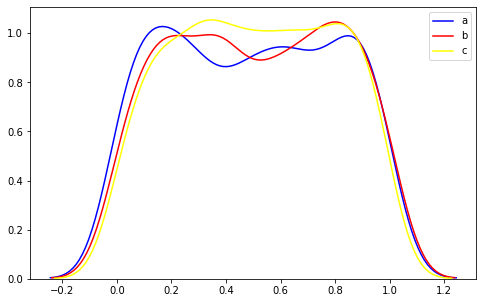

In [130]:
plt.figure(figsize=(8,5))
sns.kdeplot(mmdf.a, color='blue')
sns.kdeplot(mmdf.b, color='red')
sns.kdeplot(mmdf.c, color='yellow')
# plt.axvline(dfscaled_desc.iloc[1,0], label='mean')
# plt.axvline(dfscaled_desc.iloc[2,0], label='std')
# plt.axvline(-dfscaled_desc.iloc[2,0], label='std')
plt.show()

## RobustScaler
$\displaystyle Robust = \frac{x_{i} - median(x)}{Q3(x) - Q1(x)}$

In [131]:
from sklearn.preprocessing import RobustScaler

In [132]:
robust = RobustScaler()
robust.fit(origin[['a', 'b', 'c']])
robuscaled = robust.transform(origin[['a', 'b', 'c']])
rodf = pd.DataFrame(robuscaled, columns='a b c'.split())
rodf

,a,b,c
0,-0.666667,0.5,-0.106866
1,0.428571,-0.1,-0.657202
2,0.285714,0.1,-0.883325
3,-0.666667,-0.1,-0.346412
4,0.476190,0.0,-0.293753
...,...,...,...
995,0.904762,-0.8,-0.677852
996,0.523810,-0.6,0.002581
997,-0.047619,-0.3,0.433144
998,0.380952,-0.7,0.353640


In [133]:
rodf['a']

0     -0.666667
1      0.428571
2      0.285714
3     -0.666667
4      0.476190
         ...   
995    0.904762
996    0.523810
997   -0.047619
998    0.380952
999   -0.333333
Name: a, Length: 1000, dtype: float64

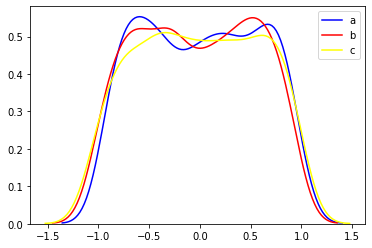

In [134]:
sns.kdeplot(rodf['a'], color='blue')
sns.kdeplot(rodf['b'], color='red')
sns.kdeplot(rodf['c'], color='yellow')

## Normalizer

In [135]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(origin['a b c'.split()])
nomscaled = normalizer.transform(origin['a b c'.split()])
nomdf = pd.DataFrame(nomscaled, columns='a b c'.split())
nomdf

,a,b,c
0,0.007816,0.013026,0.999885
1,0.027404,0.013702,0.999531
2,0.029973,0.017984,0.999389
3,0.008891,0.011261,0.999897
4,0.022432,0.011504,0.999682
...,...,...,...
995,0.035116,0.008779,0.999345
996,0.019749,0.006912,0.999781
997,0.011465,0.006961,0.999910
998,0.015643,0.005496,0.999863


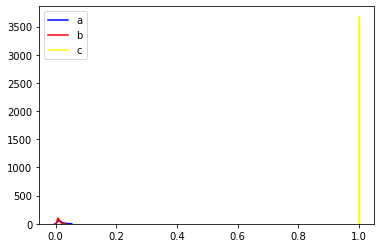

In [136]:
sns.kdeplot(nomdf['a'], color='blue')
sns.kdeplot(nomdf['b'], color='red')
sns.kdeplot(nomdf['c'], color='yellow')

https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a0m2

## MaxAbsScaler

In [137]:
from sklearn.preprocessing import MaxAbsScaler

In [138]:
maxabs = MaxAbsScaler()
maxabs.fit(origin['a b c'.split()])
mascaled = maxabs.transform(origin['a b c'.split()])
madf = pd.DataFrame(mascaled, columns=['a', 'b', 'c'])
madf

,a,b,c
0,0.306122,0.862069,0.639880
1,0.775510,0.655172,0.462154
2,0.714286,0.724138,0.389130
3,0.306122,0.655172,0.562521
4,0.795918,0.689655,0.579527
...,...,...,...
995,0.979592,0.413793,0.455485
996,0.816327,0.482759,0.675225
997,0.571429,0.586207,0.814271
998,0.755102,0.448276,0.788596


In [139]:
madf.describe()

,a,b,c
count,1000.000000,1000.000000,1000.000000
mean,0.596306,0.678379,0.671866
std,0.242775,0.195564,0.189386
min,0.204082,0.344828,0.333444
25%,0.387755,0.517241,0.516089
50%,0.591837,0.689655,0.674391
75%,0.816327,0.862069,0.839030
max,1.000000,1.000000,1.000000


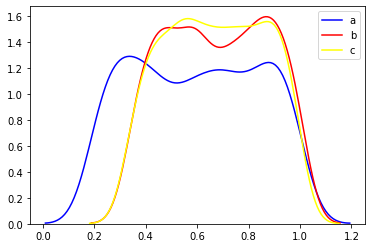

In [140]:
sns.kdeplot(madf['a'], color='blue')
sns.kdeplot(madf['b'], color='red')
sns.kdeplot(madf['c'], color='yellow')

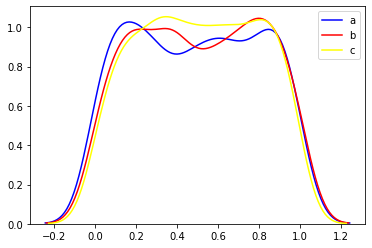

In [141]:
sns.kdeplot(mmdf['a'], color='blue')
sns.kdeplot(mmdf['b'], color='red')
sns.kdeplot(mmdf['c'], color='yellow')

## Label Encoder vs One-Hot Enconding

In [142]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [143]:
tcopy = titanic.copy()

In [144]:
tcopy

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_z,fare_prediction
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,-0.530377,32.000102
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,0.571831,37.599521
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,-0.254825,33.399957
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,0.365167,36.549630
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0.365167,36.549630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False,0.640719,37.949485
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,-0.185937,33.749921
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,-0.737041,30.950211
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,-0.254825,33.399957


In [145]:
tcopy.embark_town.unique()

array(['Southampton', 'Cherbourg', 'Queenstown', nan], dtype=object)

In [146]:
tcopy.drop(tcopy[tcopy['embark_town'].isna()==True].index, axis=0, inplace=True)
tcopy

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_z,fare_prediction
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,-0.530377,32.000102
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,0.571831,37.599521
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,-0.254825,33.399957
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,0.365167,36.549630
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0.365167,36.549630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False,0.640719,37.949485
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,-0.185937,33.749921
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,-0.737041,30.950211
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,-0.254825,33.399957


In [147]:
tcopy.embark_town.unique()

array(['Southampton', 'Cherbourg', 'Queenstown'], dtype=object)

In [148]:
label = LabelEncoder()
tcopy['embark_town_label'] = label.fit_transform(tcopy['embark_town'])
tcopy[['embark_town', 'embark_town_label']]

,embark_town,embark_town_label
0,Southampton,2
1,Cherbourg,0
2,Southampton,2
3,Southampton,2
4,Southampton,2
...,...,...
885,Queenstown,1
886,Southampton,2
887,Southampton,2
889,Cherbourg,0


In [149]:
label.classes_

array(['Cherbourg', 'Queenstown', 'Southampton'], dtype=object)

0 > 1 > 2
Cherbourg > Queenstown > Southampton

In [150]:
data = {'sekolah':['sd', 'smp', 'sma', 'kuliah'], 'gaji':[1000000,4000000,2000000,5000000]}

In [151]:
ct = ColumnTransformer([('one_hot', OneHotEncoder(categories='auto'), [12])], remainder='drop')

drop_ct = ct.fit_transform(tcopy)
drop_ct

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [152]:
len(drop_ct)

712

In [153]:
oh_embark = pd.DataFrame(drop_ct, columns=['embark_Cherbourg', 'embark_Queenstown', 'embark_Southampon'])
oh_embark

,embark_Cherbourg,embark_Queenstown,embark_Southampon
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
...,...,...,...
707,0.0,1.0,0.0
708,0.0,0.0,1.0
709,0.0,0.0,1.0
710,1.0,0.0,0.0


In [154]:
tcopy

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_z,fare_prediction,embark_town_label
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,-0.530377,32.000102,2
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,0.571831,37.599521,0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,-0.254825,33.399957,2
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,0.365167,36.549630,2
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0.365167,36.549630,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False,0.640719,37.949485,1
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,-0.185937,33.749921,2
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,-0.737041,30.950211,2
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,-0.254825,33.399957,0


In [155]:
tcopy_oh = pd.concat([tcopy, oh_embark], axis=1)
tcopy_oh

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,...,deck,embark_town,alive,alone,age_z,fare_prediction,embark_town_label,embark_Cherbourg,embark_Queenstown,embark_Southampon
0,0.0,3.0,male,22.0,1.0,0.0,7.2500,S,Third,man,...,NaN,Southampton,no,False,-0.530377,32.000102,2.0,0.0,0.0,1.0
1,1.0,1.0,female,38.0,1.0,0.0,71.2833,C,First,woman,...,C,Cherbourg,yes,False,0.571831,37.599521,0.0,1.0,0.0,0.0
2,1.0,3.0,female,26.0,0.0,0.0,7.9250,S,Third,woman,...,NaN,Southampton,yes,True,-0.254825,33.399957,2.0,0.0,0.0,1.0
3,1.0,1.0,female,35.0,1.0,0.0,53.1000,S,First,woman,...,C,Southampton,yes,False,0.365167,36.549630,2.0,0.0,0.0,1.0
4,0.0,3.0,male,35.0,0.0,0.0,8.0500,S,Third,man,...,NaN,Southampton,no,True,0.365167,36.549630,2.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0.0,3.0,female,39.0,0.0,5.0,29.1250,Q,Third,woman,...,NaN,Queenstown,no,False,0.640719,37.949485,1.0,NaN,NaN,NaN
886,0.0,2.0,male,27.0,0.0,0.0,13.0000,S,Second,man,...,NaN,Southampton,no,True,-0.185937,33.749921,2.0,NaN,NaN,NaN
887,1.0,1.0,female,19.0,0.0,0.0,30.0000,S,First,woman,...,B,Southampton,yes,True,-0.737041,30.950211,2.0,NaN,NaN,NaN
889,1.0,1.0,male,26.0,0.0,0.0,30.0000,C,First,man,...,C,Cherbourg,yes,True,-0.254825,33.399957,0.0,NaN,NaN,NaN


In [156]:
tcopy_oh.iloc[711]

survived             NaN
pclass               NaN
sex                  NaN
age                  NaN
sibsp                NaN
parch                NaN
fare                 NaN
embarked             NaN
class                NaN
who                  NaN
adult_male           NaN
deck                 NaN
embark_town          NaN
alive                NaN
alone                NaN
age_z                NaN
fare_prediction      NaN
embark_town_label    NaN
embark_Cherbourg       0
embark_Queenstown      1
embark_Southampon      0
Name: 711, dtype: object

In [157]:
tcopy = tcopy.set_index(np.array(list(range(712))))
tcopy

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_z,fare_prediction,embark_town_label
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,-0.530377,32.000102,2
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,0.571831,37.599521,0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,-0.254825,33.399957,2
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,0.365167,36.549630,2
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0.365167,36.549630,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False,0.640719,37.949485,1
708,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,-0.185937,33.749921,2
709,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,-0.737041,30.950211,2
710,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,-0.254825,33.399957,0


In [158]:
correct_concat = pd.concat([tcopy, oh_embark], axis=1)
correct_concat

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,...,deck,embark_town,alive,alone,age_z,fare_prediction,embark_town_label,embark_Cherbourg,embark_Queenstown,embark_Southampon
0,0,3,male,22.0,1,0,7.2500,S,Third,man,...,NaN,Southampton,no,False,-0.530377,32.000102,2,0.0,0.0,1.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,...,C,Cherbourg,yes,False,0.571831,37.599521,0,1.0,0.0,0.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,...,NaN,Southampton,yes,True,-0.254825,33.399957,2,0.0,0.0,1.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,...,C,Southampton,yes,False,0.365167,36.549630,2,0.0,0.0,1.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,...,NaN,Southampton,no,True,0.365167,36.549630,2,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,0,3,female,39.0,0,5,29.1250,Q,Third,woman,...,NaN,Queenstown,no,False,0.640719,37.949485,1,0.0,1.0,0.0
708,0,2,male,27.0,0,0,13.0000,S,Second,man,...,NaN,Southampton,no,True,-0.185937,33.749921,2,0.0,0.0,1.0
709,1,1,female,19.0,0,0,30.0000,S,First,woman,...,B,Southampton,yes,True,-0.737041,30.950211,2,0.0,0.0,1.0
710,1,1,male,26.0,0,0,30.0000,C,First,man,...,C,Cherbourg,yes,True,-0.254825,33.399957,0,1.0,0.0,0.0


## Ridge, Lasso dan Elastic-Net

Overfitting
- Bisa kurangin kompleksitas features dengan cara menghapus beberapa kolom
- ngurangin presentase dari si X_train nya

Underfitting
- Menambah features, feature engineering
- nambahin presentase dari si X_train nya 

In [159]:
data = {
    'x':np.arange(10),
    'y':np.arange(10) + np.random.randn(10)
}
df = pd.DataFrame(data)
df

,x,y
0,0,0.065133
1,1,0.565243
2,2,2.856038
3,3,1.810830
4,4,5.950530
5,5,6.131482
6,6,5.887245
7,7,6.817097
8,8,7.706746
9,9,8.892136


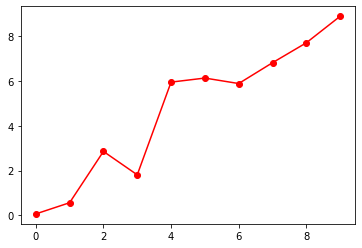

In [160]:
plt.plot(df['x'], df['y'], 'ro-')

## LinearRegression train all data

In [161]:
model = LinearRegression()
model.fit(df[['x']], df['y'])
print('slope (b)=', model.coef_)
print('intercept (a)=', model.intercept_)

slope (b)= [0.97969114]
intercept (a)= 0.25963773556792


In [162]:
df['y_pred'] = model.predict(df[['x']])
df

,x,y,y_pred
0,0,0.065133,0.259638
1,1,0.565243,1.239329
2,2,2.856038,2.219020
3,3,1.810830,3.198711
4,4,5.950530,4.178402
5,5,6.131482,5.158093
6,6,5.887245,6.137785
7,7,6.817097,7.117476
8,8,7.706746,8.097167
9,9,8.892136,9.076858


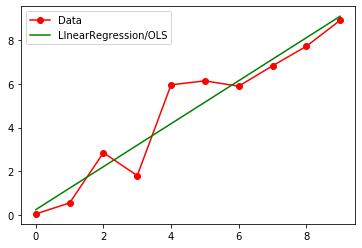

In [163]:
plt.plot(df['x'], df['y'], 'ro-')
plt.plot(df['x'], df['y_pred'], 'g-')
plt.legend(['Data', 'LInearRegression/OLS'])

## LinearRegression Train using Train_Test_Split

In [164]:
X_train, X_test, y_train, y_test = train_test_split(df[['x']], df['y'], train_size=0.8)

In [165]:
X_train

,x
9,9
0,0
8,8
2,2
6,6
1,1
5,5
7,7


In [166]:
X_test

,x
3,3
4,4


In [167]:
model.fit(X_train, y_train)
df['y_pred_split'] = model.predict(df[['x']])
df

,x,y,y_pred,y_pred_split
0,0,0.065133,0.259638,0.277312
1,1,0.565243,1.239329,1.243171
2,2,2.856038,2.219020,2.209029
3,3,1.810830,3.198711,3.174888
4,4,5.950530,4.178402,4.140746
5,5,6.131482,5.158093,5.106605
6,6,5.887245,6.137785,6.072463
7,7,6.817097,7.117476,7.038321
8,8,7.706746,8.097167,8.004180
9,9,8.892136,9.076858,8.970038


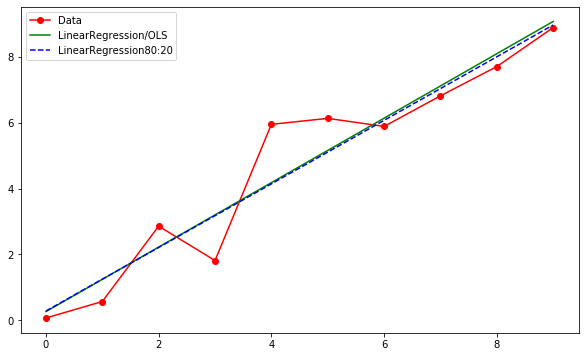

In [168]:
plt.figure(figsize=(10,6))
plt.plot(df['x'],df['y'],'ro-')
plt.plot(df['x'],df['y_pred'],'g-')
plt.plot(df['x'],df['y_pred_split'], 'b--')
plt.legend(['Data', 'LinearRegression/OLS', 'LinearRegression80:20'])

## Train Only With 2 Data

In [169]:
model.fit(df[['x']].iloc[0:2], df['y'].iloc[0:2])
df['y_pred_2data'] = model.predict(df[['x']])
df

,x,y,y_pred,y_pred_split,y_pred_2data
0,0,0.065133,0.259638,0.277312,0.065133
1,1,0.565243,1.239329,1.243171,0.565243
2,2,2.856038,2.219020,2.209029,1.065353
3,3,1.810830,3.198711,3.174888,1.565464
4,4,5.950530,4.178402,4.140746,2.065574
5,5,6.131482,5.158093,5.106605,2.565684
6,6,5.887245,6.137785,6.072463,3.065794
7,7,6.817097,7.117476,7.038321,3.565904
8,8,7.706746,8.097167,8.004180,4.066014
9,9,8.892136,9.076858,8.970038,4.566124


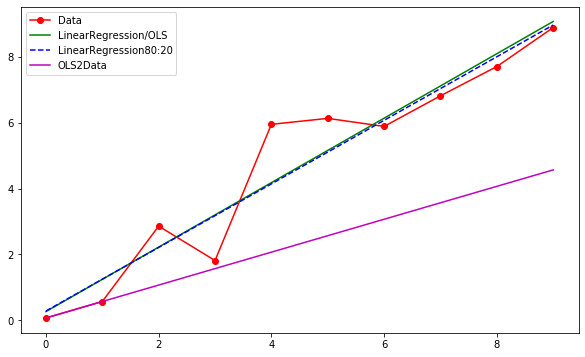

In [170]:
plt.figure(figsize=(10,6))
plt.plot(df['x'],df['y'],'ro-')
plt.plot(df['x'],df['y_pred'],'g-')
plt.plot(df['x'],df['y_pred_split'], 'b--')
plt.plot(df['x'],df['y_pred_2data'], 'm-')
plt.legend(['Data', 'LinearRegression/OLS', 'LinearRegression80:20', 'OLS2Data'])

## Ridge Regression

Sum Squared Error (SSE).Ordinary Least Squared (OLS) = $\sum (y_i - \hat{y_i})^2$

L(Loss Function)2 Regularization dan L(Loss Function)1 Regularization

$ Ridge = SSE.OLS + \lambda \times \sum b^2 $

$ Ridge = \sum (y - \hat{y})^2 +\lambda \times \sum b^2 $

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

In [171]:
from sklearn.linear_model import Ridge

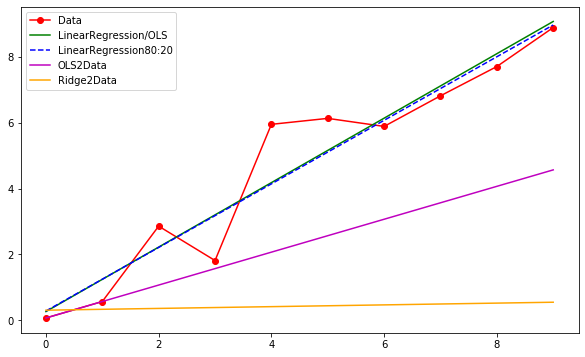

In [182]:
modelR = Ridge(alpha=8.8)
modelR.fit(df[['x']].iloc[0:2], df['y'].iloc[0:2])
df['y_pred_2data_ridge'] = modelR.predict(df[['x']])

plt.figure(figsize=(10,6))
plt.plot(df['x'],df['y'],'ro-')
plt.plot(df['x'],df['y_pred'],'g-')
plt.plot(df['x'],df['y_pred_split'], 'b--')
plt.plot(df['x'],df['y_pred_2data'], 'm-')
plt.plot(df['x'], df['y_pred_2data_ridge'], 'orange')
plt.legend(['Data', 'LinearRegression/OLS', 'LinearRegression80:20', 'OLS2Data', 'Ridge2Data'])
plt.show()

## Lasso

Sum Squared Error (SSE).Ordinary Least Squared (OLS) = $\sum (y - \hat{y})^2$

$ LASSO = \sum (y - \hat{y})^2 + \lambda . \sum|b| $ 

$LASSO = SSE.OLS + \lambda . \sum|b| $

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

In [183]:
from sklearn.linear_model import Lasso

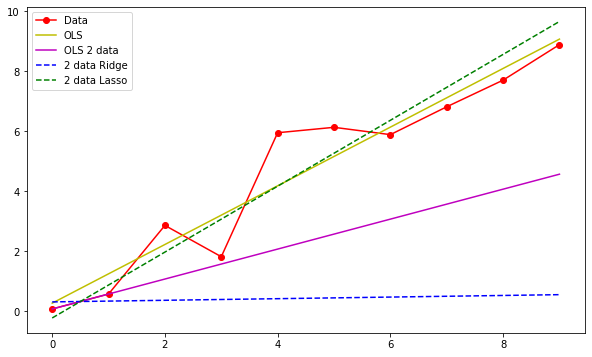

In [191]:
modelLas = Lasso(alpha=-0.15)
modelLas.fit(df[['x']].iloc[0:2], df['y'].iloc[0:2])
df['y_pred_2data_lasso'] = modelLas.predict(df[['x']])

plt.figure(figsize=(10,6))
plt.plot(df['x'], df['y'], 'ro-')
plt.plot(df['x'], df['y_pred'], 'y-')
plt.plot(df['x'], df['y_pred_2data'], 'm-')
plt.plot(df['x'], df['y_pred_2data_ridge'], 'b--')
plt.plot(df['x'], df['y_pred_2data_lasso'], 'g--')
plt.legend(['Data', 'OLS', 'OLS 2 data', '2 data Ridge', '2 data Lasso'])
plt.show()

In [198]:
df

,x,y,y_pred,y_pred_split,y_pred_2data,y_pred_2data_ridge,y_pred_2data_lasso
0,0,0.065133,0.259638,0.277312,0.065133,0.301744,-0.234867
1,1,0.565243,1.239329,1.243171,0.565243,0.328632,0.865243
2,2,2.856038,2.219020,2.209029,1.065353,0.355520,1.965353
3,3,1.810830,3.198711,3.174888,1.565464,0.382407,3.065464
4,4,5.950530,4.178402,4.140746,2.065574,0.409295,4.165574
5,5,6.131482,5.158093,5.106605,2.565684,0.436183,5.265684
6,6,5.887245,6.137785,6.072463,3.065794,0.463070,6.365794
7,7,6.817097,7.117476,7.038321,3.565904,0.489958,7.465904
8,8,7.706746,8.097167,8.004180,4.066014,0.516845,8.566014
9,9,8.892136,9.076858,8.970038,4.566124,0.543733,9.666124


In [199]:
print('RMSE OLS all data:', np.sqrt(mse(df['y'], df['y_pred'])))
print('RMSE OLS 80:20 data:', np.sqrt(mse(df['y'], df['y_pred_split'])))
print('RMSE OLS 2 data:', np.sqrt(mse(df['y'], df['y_pred_2data'])))
print('RMSE ridge 2 data:', np.sqrt(mse(df['y'], df['y_pred_2data_ridge'])))
print('RMSE lasso 2 data:', np.sqrt(mse(df['y'], df['y_pred_2data_lasso'])))

RMSE OLS all data: 0.8515691143455262
RMSE OLS 80:20 data: 0.8536599144138997
RMSE OLS 2 data: 2.8561283897957566
RMSE ridge 2 data: 5.122416674476503
RMSE lasso 2 data: 0.9203510276051309


## Elastic-Net
Sum Squared Error OLS $ = \sum (y - \hat{y})^2 $

SSE EN = $ SSE .OLS \displaystyle + \lambda_{ridge} \times \sum b^2 + \lambda_{lasso} \times \sum |b| $

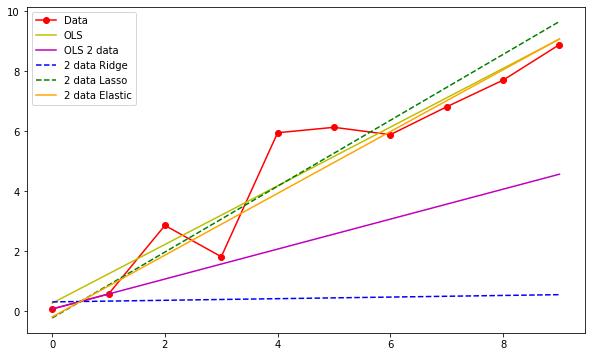

In [208]:
from sklearn.linear_model import ElasticNet

modelE = ElasticNet(alpha=-0.13, l1_ratio=0.3)
modelE.fit(df[['x']].iloc[0:2], df['y'].iloc[0:2])

df['y_pred_2data_elas'] = modelE.predict(df[['x']])

plt.figure(figsize=(10,6))
plt.plot(df['x'], df['y'], 'ro-')
plt.plot(df['x'], df['y_pred'], 'y-')
plt.plot(df['x'], df['y_pred_2data'], 'm-')
plt.plot(df['x'], df['y_pred_2data_ridge'], 'b--')
plt.plot(df['x'], df['y_pred_2data_lasso'], 'g--')
plt.plot(df['x'], df['y_pred_2data_elas'], 'orange')
plt.legend(['Data', 'OLS', 'OLS 2 data', '2 data Ridge', '2 data Lasso', '2 data Elastic'])
plt.show()

## Polynomial Regression

In [209]:
x = np.arange(0, 360, 10)
y = np.cos(x * np.pi/180) + np.random.normal(0,0.15,len(x))
df_poly = pd.DataFrame({'x':x, 'y':y})
df_poly

,x,y
0,0,1.200960
1,10,0.656662
2,20,0.773371
3,30,1.092026
4,40,0.611145
5,50,1.047286
6,60,0.702472
7,70,0.516409
8,80,0.336366
9,90,-0.083188


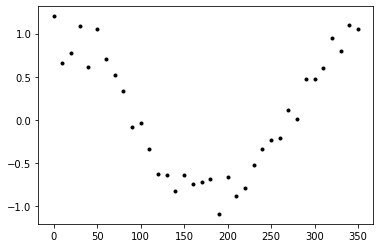

In [211]:
plt.plot(df_poly['x'], df_poly['y'], 'k.')

In [216]:
lrp = LinearRegression()
rip = Ridge(alpha=1)
lap = Lasso(alpha=2)
elap = ElasticNet(alpha=3, l1_ratio=0.3)

lrp.fit(df_poly[['x']], df_poly['y'])
rip.fit(df_poly[['x']], df_poly['y'])
lap.fit(df_poly[['x']], df_poly['y'])
elap.fit(df_poly[['x']], df_poly['y'])

ElasticNet(alpha=3, copy_X=True, fit_intercept=True, l1_ratio=0.3,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [217]:
df_poly['linear'] = lrp.predict(df_poly[['x']])
df_poly['ridge'] = rip.predict(df_poly[['x']])
df_poly['lasso'] = lap.predict(df_poly[['x']])
df_poly['elastic'] = elap.predict(df_poly[['x']])

In [218]:
df_poly

,x,y,linear,ridge,lasso,elastic
0,0,1.200960,0.147830,0.147829,0.115397,0.133222
1,10,0.656662,0.143207,0.143207,0.112628,0.129434
2,20,0.773371,0.138584,0.138584,0.109858,0.125646
3,30,1.092026,0.133961,0.133961,0.107089,0.121858
4,40,0.611145,0.129338,0.129338,0.104319,0.118070
5,50,1.047286,0.124715,0.124715,0.101549,0.114282
6,60,0.702472,0.120093,0.120093,0.098780,0.110493
7,70,0.516409,0.115470,0.115470,0.096010,0.106705
8,80,0.336366,0.110847,0.110847,0.093241,0.102917
9,90,-0.083188,0.106224,0.106224,0.090471,0.099129


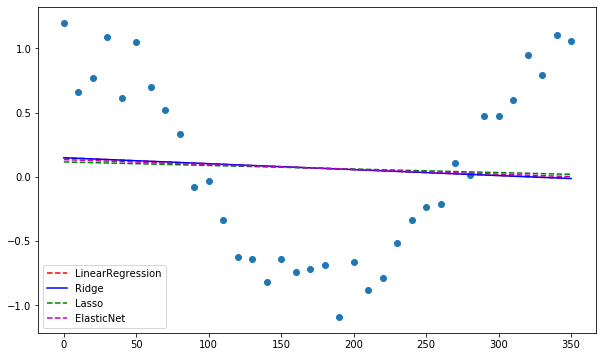

In [219]:
plt.figure(figsize=(10,6))
plt.scatter(df_poly['x'], df_poly['y'])
plt.plot(df_poly['x'], df_poly['linear'], 'r--', label='LinearRegression')
plt.plot(df_poly['x'], df_poly['ridge'], 'b-', label='Ridge')
plt.plot(df_poly['x'], df_poly['lasso'], 'g--', label='Lasso')
plt.plot(df_poly['x'], df_poly['elastic'], 'm--', label='ElasticNet')
plt.legend()
plt.show()

In [220]:
df_poly.head()

,x,y,linear,ridge,lasso,elastic
0,0,1.200960,0.147830,0.147829,0.115397,0.133222
1,10,0.656662,0.143207,0.143207,0.112628,0.129434
2,20,0.773371,0.138584,0.138584,0.109858,0.125646
3,30,1.092026,0.133961,0.133961,0.107089,0.121858
4,40,0.611145,0.129338,0.129338,0.104319,0.118070


In [221]:
for i in range(2,5):
    df_poly[f'x{i}'] = df_poly['x']**i

In [222]:
df_poly.head()

,x,y,linear,ridge,lasso,elastic,x2,x3,x4
0,0,1.200960,0.147830,0.147829,0.115397,0.133222,0,0,0
1,10,0.656662,0.143207,0.143207,0.112628,0.129434,100,1000,10000
2,20,0.773371,0.138584,0.138584,0.109858,0.125646,400,8000,160000
3,30,1.092026,0.133961,0.133961,0.107089,0.121858,900,27000,810000
4,40,0.611145,0.129338,0.129338,0.104319,0.118070,1600,64000,2560000


In [226]:
polymodel = LinearRegression()
polymodel.fit(df_poly[['x','x2']], df_poly['y'])
df_poly['poly_pred'] = polymodel.predict(df_poly[['x', 'x2']])
df_poly.head()

,x,y,linear,ridge,lasso,elastic,x2,x3,x4,poly_pred
0,0,1.200960,0.147830,0.147829,0.115397,0.133222,0,0,0,1.489403
1,10,0.656662,0.143207,0.143207,0.112628,0.129434,100,1000,10000,1.254796
2,20,0.773371,0.138584,0.138584,0.109858,0.125646,400,8000,160000,1.033718
3,30,1.092026,0.133961,0.133961,0.107089,0.121858,900,27000,810000,0.826168
4,40,0.611145,0.129338,0.129338,0.104319,0.118070,1600,64000,2560000,0.632147


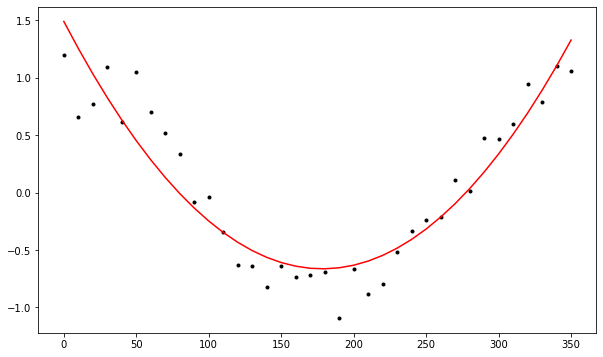

In [228]:
plt.figure(figsize=(10,6))
plt.plot(df_poly['x'], df_poly['y'], 'k.')
plt.plot(df_poly['x'], df_poly['poly_pred'], 'r-')
plt.show()

In [229]:
x_list = ['x']
for i in range(2,5):
    x_list.append(f'x{i}')
    modelrp = LinearRegression()
    modelrp.fit(df_poly[x_list], df_poly['y'])
    df_poly[f'predict_lr{i}'] = modelrp.predict(df_poly[x_list])
    
df_poly.head()

,x,y,linear,ridge,lasso,elastic,x2,x3,x4,poly_pred,predict_lr2,predict_lr3,predict_lr4
0,0,1.200960,0.147830,0.147829,0.115397,0.133222,0,0,0,1.489403,1.489403,1.355445,1.332589
1,10,0.656662,0.143207,0.143207,0.112628,0.129434,100,1000,10000,1.254796,1.254796,1.166767,1.153183
2,20,0.773371,0.138584,0.138584,0.109858,0.125646,400,8000,160000,1.033718,1.033718,0.984863,0.979295
3,30,1.092026,0.133961,0.133961,0.107089,0.121858,900,27000,810000,0.826168,0.826168,0.810142,0.811389
4,40,0.611145,0.129338,0.129338,0.104319,0.118070,1600,64000,2560000,0.632147,0.632147,0.643015,0.649916


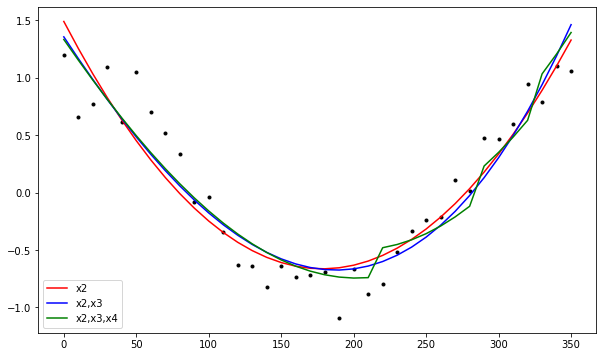

In [231]:
plt.figure(figsize=(10,6))
plt.plot(df_poly['x'], df_poly['y'], 'k.')
plt.plot(df_poly['x'], df_poly['predict_lr2'], 'r-', label='x2')
plt.plot(df_poly['x'], df_poly['predict_lr3'], 'b-', label='x2,x3')
plt.plot(df_poly['x'], df_poly['predict_lr4'], 'g-', label='x2,x3,x4')
plt.legend()
plt.show()

https://www.youtube.com/watch?v=Qnt2vBRW8Io

In [232]:
from sklearn.preprocessing import PolynomialFeatures

In [236]:
a = [2]
a_poly = PolynomialFeatures(3, include_bias=False)
#include bias maksudnya, apakah mengikutsertakan pangkat 0 atau tidak
a_poly.fit_transform([a])

array([[2., 4., 8.]])

In [240]:
b = [3,6,9]
b_poly = PolynomialFeatures(5, include_bias=False)
bp = b_poly.fit_transform(np.array(b).reshape(-1,1))
bp

array([[3.0000e+00, 9.0000e+00, 2.7000e+01, 8.1000e+01, 2.4300e+02],
       [6.0000e+00, 3.6000e+01, 2.1600e+02, 1.2960e+03, 7.7760e+03],
       [9.0000e+00, 8.1000e+01, 7.2900e+02, 6.5610e+03, 5.9049e+04]])

In [242]:
bdf = pd.DataFrame(bp, columns=['x1', 'x2', 'x3', 'x4', 'x5'])
bdf

,x1,x2,x3,x4,x5
0,3.0,9.0,27.0,81.0,243.0
1,6.0,36.0,216.0,1296.0,7776.0
2,9.0,81.0,729.0,6561.0,59049.0


In [239]:
b = [3,6,9]
np.array(b).reshape(-1,1)

array([[3],
       [6],
       [9]])

In [244]:
dfp = pd.DataFrame({'c': np.arange(1,11)})
x = PolynomialFeatures(10, include_bias=False)
cp = x.fit_transform(dfp[['c']])
new_df = pd.DataFrame(cp)
pd.concat([dfp, new_df], axis=1)

,c,0,1,2,3,4,5,6,7,8,9
0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000e+00,1.000000e+00
1,2,2.0,4.0,8.0,16.0,32.0,64.0,128.0,256.0,5.120000e+02,1.024000e+03
2,3,3.0,9.0,27.0,81.0,243.0,729.0,2187.0,6561.0,1.968300e+04,5.904900e+04
3,4,4.0,16.0,64.0,256.0,1024.0,4096.0,16384.0,65536.0,2.621440e+05,1.048576e+06
4,5,5.0,25.0,125.0,625.0,3125.0,15625.0,78125.0,390625.0,1.953125e+06,9.765625e+06
5,6,6.0,36.0,216.0,1296.0,7776.0,46656.0,279936.0,1679616.0,1.007770e+07,6.046618e+07
6,7,7.0,49.0,343.0,2401.0,16807.0,117649.0,823543.0,5764801.0,4.035361e+07,2.824752e+08
7,8,8.0,64.0,512.0,4096.0,32768.0,262144.0,2097152.0,16777216.0,1.342177e+08,1.073742e+09
8,9,9.0,81.0,729.0,6561.0,59049.0,531441.0,4782969.0,43046721.0,3.874205e+08,3.486784e+09
9,10,10.0,100.0,1000.0,10000.0,100000.0,1000000.0,10000000.0,100000000.0,1.000000e+09,1.000000e+10


## Pipeline